In [3]:
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#Convert into label encoding
#Both functions are same
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import LabelEncoder

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving heart_2020_cleaned.csv to heart_2020_cleaned (1).csv


In [7]:
df_Heart= pd.read_csv('heart_2020_cleaned.csv')

In [8]:
df_Heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [9]:
#Number of rows and columns
df_Heart.shape

(319795, 18)

In [10]:
#Checking datatypes
df_Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [11]:
#Checking datatypes
df_Heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [12]:
# Unbalanced class problem
df_Heart['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [13]:
#Get Numeric columns
df_Heart_Numeric=df_Heart._get_numeric_data()

In [14]:
#Descriptive analysis of numeric columns
df_Heart_Numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [15]:
#Get Object columns
df_Heart_Object= df_Heart.select_dtypes(include=['object'])

In [16]:
# Label encoding : HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, PhysicalActivity, GenHealth
# Asthma, KidneyDisease, SkinCancer

# On-hot encoding : Race

# Doubtsful : AgeCategory, Diabetic

for col in df_Heart_Object:
    print("Column : " + col)
    print(df_Heart[col].value_counts())
    print("_______________________________")

Column : HeartDisease
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
_______________________________
Column : Smoking
No     187887
Yes    131908
Name: Smoking, dtype: int64
_______________________________
Column : AlcoholDrinking
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
_______________________________
Column : Stroke
No     307726
Yes     12069
Name: Stroke, dtype: int64
_______________________________
Column : DiffWalking
No     275385
Yes     44410
Name: DiffWalking, dtype: int64
_______________________________
Column : Sex
Female    167805
Male      151990
Name: Sex, dtype: int64
_______________________________
Column : AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
______________

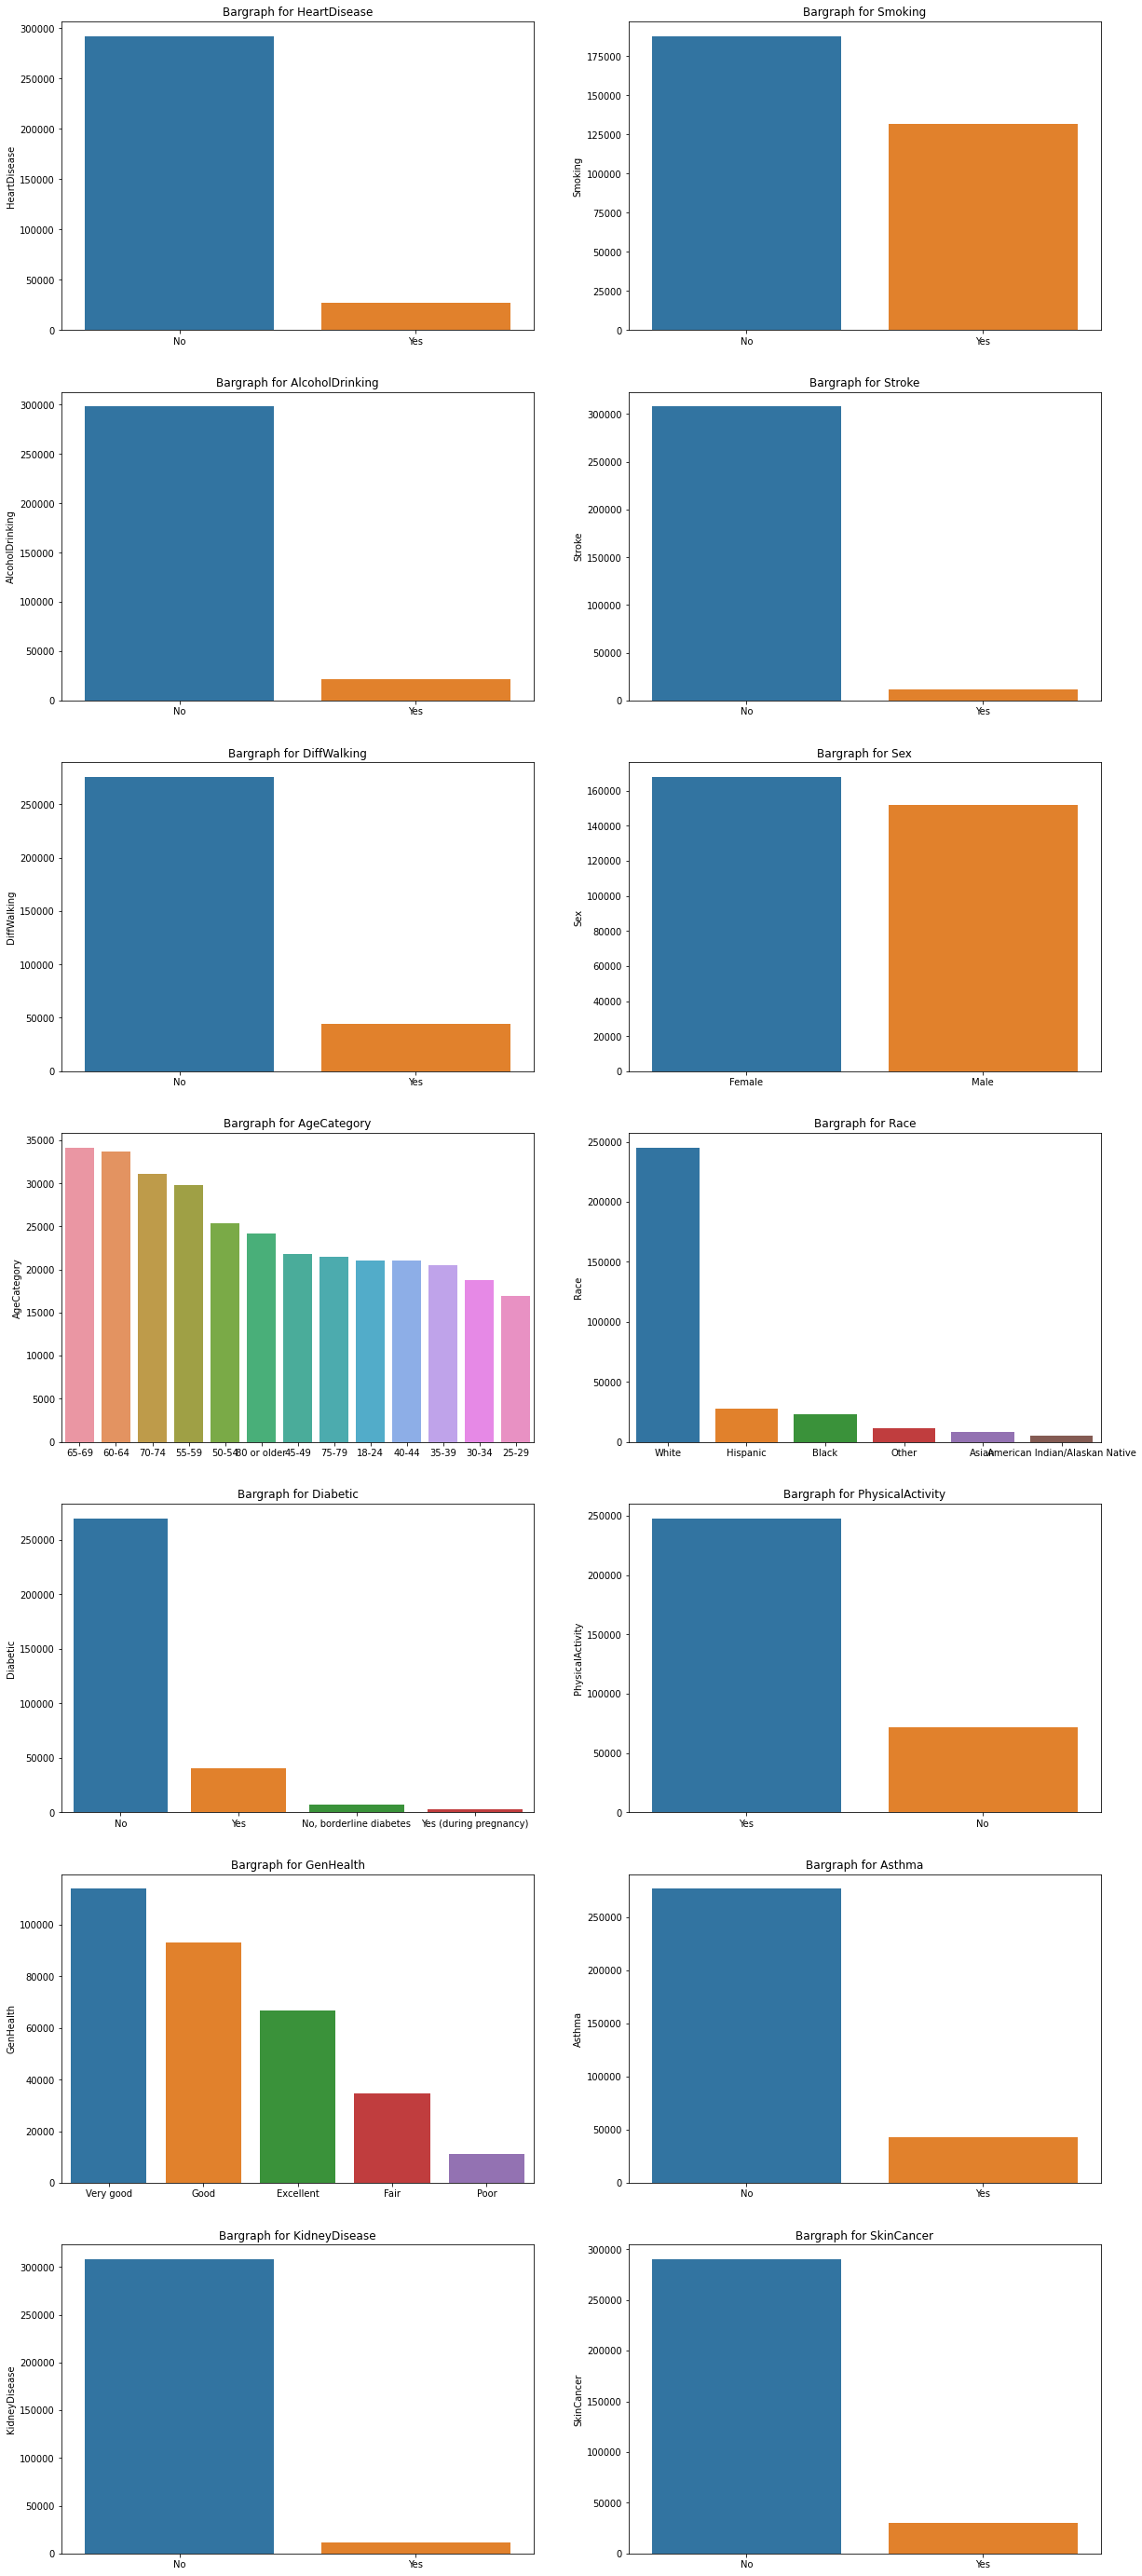

In [17]:
plt.figure(figsize=(20, 50))
for i, col in enumerate(df_Heart_Object.columns):
    ax= plt.subplot(7, 2, i+1)
    ax.set_title(f"Bargraph for {col}")
    value=df_Heart[col].value_counts().to_frame()
    sns.barplot(data=value, y=value.columns[0], x=value.index)

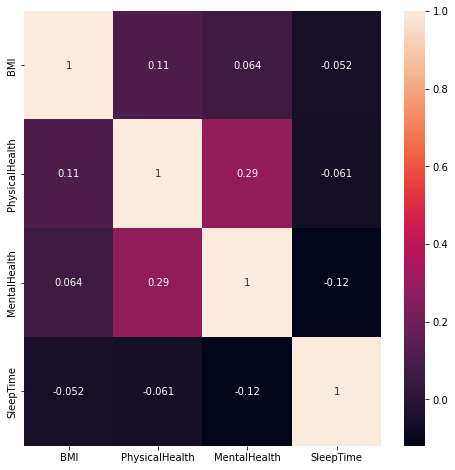

In [18]:
#Building heatmap on the correlartion data 
#This will help build visualizationbetter

plt.subplots(figsize=(8,8))
sns.heatmap(df_Heart.corr(),annot=True)

In [19]:
#Converting all categorical columns to label encoding
lblEncoder= LabelEncoder()

for col in df_Heart_Object.columns:
    df_Heart[col]= lblEncoder.fit_transform(df_Heart_Object[col])
    df_Heart_Object[col]= lblEncoder.fit_transform(df_Heart_Object[col])

In [20]:
df_Heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# Data has been converted to numeric. All Categorical columns have been label encoded. Now we will do Explorative Data Analysis (EDA)


# Univariate Analysis

In [21]:
#Descriptive analysis of numeric columns
df_Heart_Numeric.describe().transpose()

#Observation
#1- All the numeric columns are right skewed

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


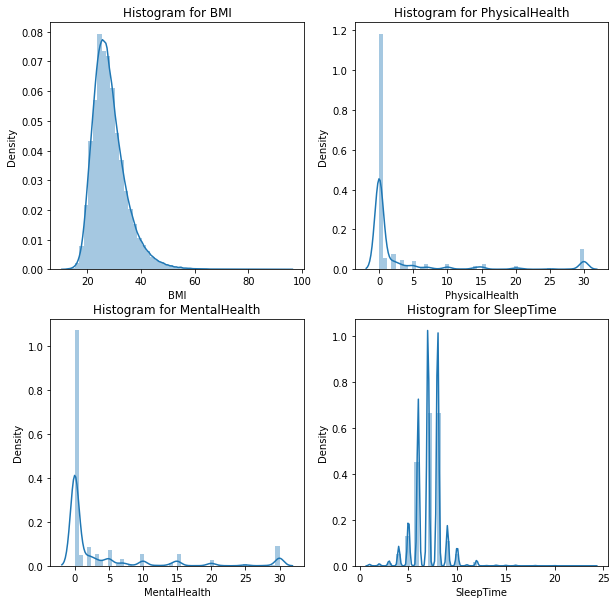

In [22]:
#Observation
#All the numeric columns are right skewed. There are outliers towards the right.

plt.figure(figsize=(10, 10))
for i,col in enumerate(df_Heart_Numeric):
    ax= plt.subplot(2, 2, i+1)
    ax.set_title(f"Histogram for {col}")
    sns.distplot(df_Heart_Numeric[col])

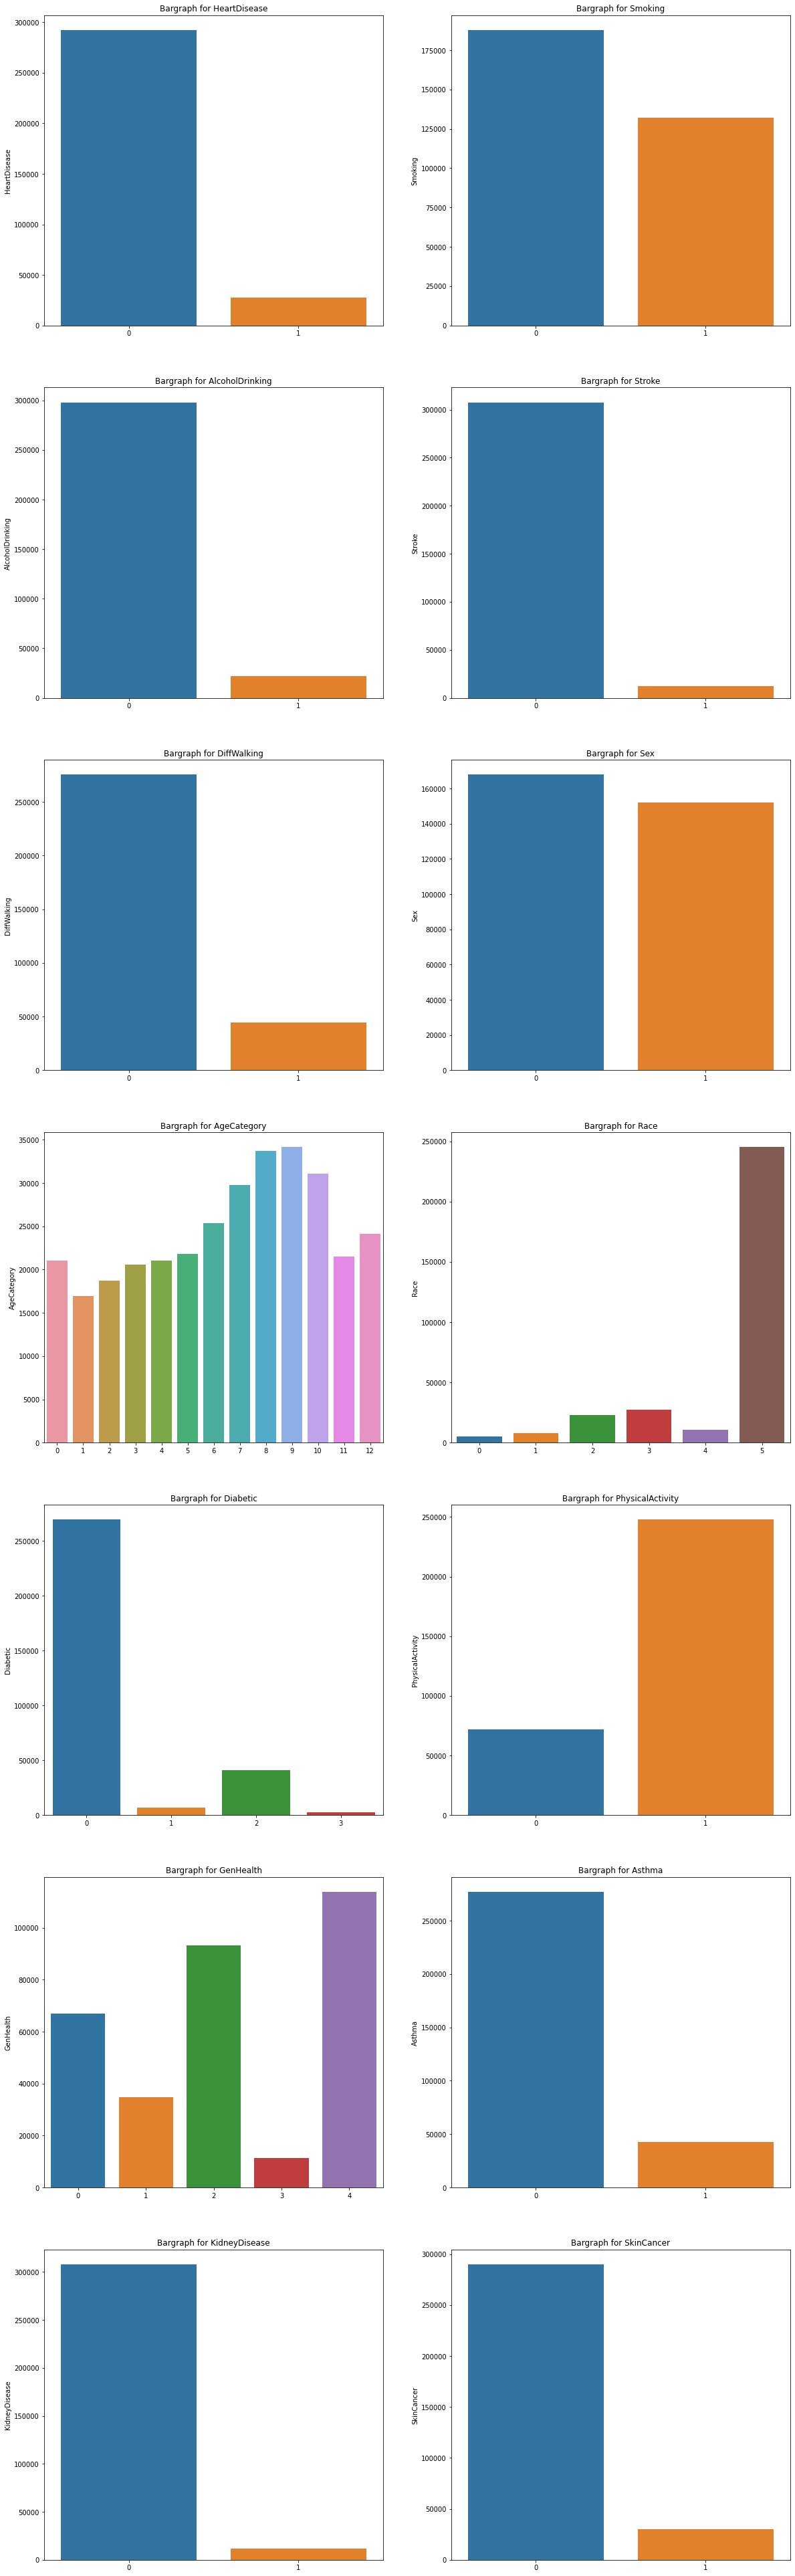

In [23]:
# Building bar graph on all categorical columns

plt.figure(figsize=(20, 70))
for i, col in enumerate(df_Heart_Object.columns):
    ax= plt.subplot(7, 2, i+1)
    ax.set_title(f"Bargraph for {col}")
    value=df_Heart[col].value_counts().to_frame()
    sns.barplot(data=value, y=value.columns[0], x=value.index)
    

#Observation   
#1 -Target class HeartDisease is imbalanced. There are very less rows on class type 1
#2 - Alcoholdrinking, Stroke, Diffwalking, Asthama, KidneyDesease, Skincaner are imbalaced too. Very less data rows 
# for class type 1.
#3 - Age and GenHealth columns are quite balanced
#4 - Race has very high representation of class 5 and rest classes have very less rows
#5 - Diabetic is unbalanced as well, most rows are of class type 0.
#6 - Physicalactivity is unbalanced as well, class type 1 has very high representation as compared to class type 0.

# Bivariate Analysis

In [24]:
#def plot_kde(feature):
#    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
#    sns.histplot(data=df_Heart_Object, x=feature, hue="HeartDisease", multiple="dodge", shrink=.8, hue_order = ['Yes', 'No'])
#    plt.title(f'{feature} with Heart Disease')
#    plt.show()

In [25]:
#Observation
# Checking the significance of all Categorigal columns with Target column (HearDisease)

#for feature in df_Heart_Object.iloc[:, 1:]:
#    plot_kde(feature)

# Multivariate Analysis

In [26]:
dd_corr=df_Heart.corr()
dd_corr

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


In [27]:
# Based on the correlation map we could say that following fields have the largest correlation
# The ones with the highest correlation with the target column "class" will affect model the most.

#These columns are the most significant columns while building Decision Tree
dd_corr[(dd_corr['HeartDisease']>=0.1)|(dd_corr['HeartDisease']<=-0.1)]['HeartDisease']

#Observation
#1 - Here we are checking correlation to be higher than 0.1 or less than -0.1
#2 - Based on this we can say that Smoking, Stroke, PhysicalHealth, DiffWalking, AgeCategory, Diabetic, 
# PhysicalActivity and KidneyDisease are the most significat columns. They are affecting the target column
# "HeartDisease" the most.

HeartDisease        1.000000
Smoking             0.107764
Stroke              0.196835
PhysicalHealth      0.170721
DiffWalking         0.201258
AgeCategory         0.233432
Diabetic            0.168553
PhysicalActivity   -0.100030
KidneyDisease       0.145197
Name: HeartDisease, dtype: float64

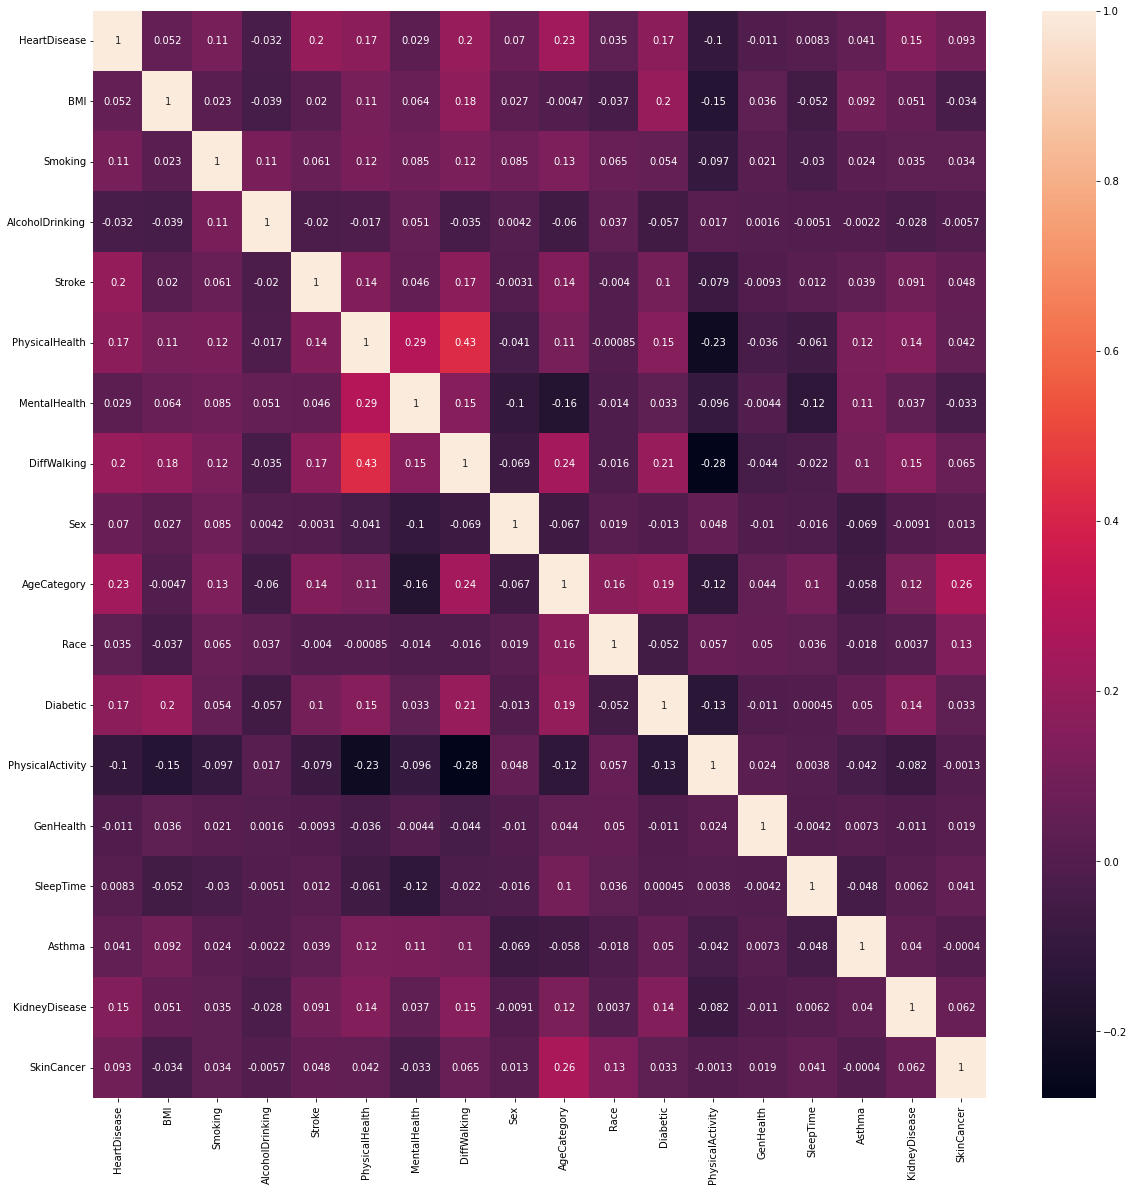

In [28]:
#Building heatmap on the correlartion data 
#This will help build visualizationbetter

plt.subplots(figsize=(20,20))
sns.heatmap(df_Heart.corr(),annot=True)

# Comparing ML Classifier algorithms

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import RocCurveDisplay

In [30]:
features = df_Heart[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race', 'Diabetic', 'GenHealth']]

labels = df_Heart['HeartDisease']

In [31]:
#Splitting the dataset- 20% for validation, and the rest 80% for training
train_df = df_Heart[:int(len(df_Heart)*0.8)]
test_df = df_Heart[int(len(df_Heart)*0.8):]

In [32]:
print('\nData in Train:')
print(train_df['HeartDisease'].value_counts())

print('\nData in Test:')
print(test_df['HeartDisease'].value_counts())


Data in Train:
0    233851
1     21985
Name: HeartDisease, dtype: int64

Data in Test:
0    58571
1     5388
Name: HeartDisease, dtype: int64


In [33]:
#Oversampling the data to make it balanced

In [34]:
class_0 = train_df[train_df['HeartDisease'] == 0]
class_1 = train_df[train_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['HeartDisease'].value_counts())

Data in Train:
0    233851
1    233851
Name: HeartDisease, dtype: int64


In [35]:
class_0 = test_df[test_df['HeartDisease'] == 0]
class_1 = test_df[test_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
test_df = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(test_df['HeartDisease'].value_counts())

Data in Test:
0    58571
1    58571
Name: HeartDisease, dtype: int64


In [36]:
#Now the data is balanced

In [37]:
#Creating arrays x_test, y_test, x_train, y_train to train and evaluating the model

x_train = np.array(train_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race','Diabetic', 'GenHealth']])
y_train = np.array(train_df['HeartDisease'])

x_test = np.array(test_df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race','Diabetic', 'GenHealth']])
y_test = np.array(test_df['HeartDisease'])

In [38]:
# Create training and testing data for machine learning application
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = train_df['HeartDisease']
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

In [39]:
# Create Random Forest
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)
model_y_predict = model.predict(x_test)

In [40]:
print(f'model: {str(model)}')
print(f'Accuracy_score: {accuracy_score(y_test,model_y_predict)}')
print(f'Precission_score: {precision_score(y_test,model_y_predict)}')
print(f'Recall_score: {recall_score(y_test,model_y_predict)}')
print(f'F1-score: {f1_score(y_test,model_y_predict)}')

model: RandomForestClassifier()
Accuracy_score: 0.7759485145551148
Precission_score: 0.7538410414793385
Recall_score: 0.8217558065203494
F1-score: 0.786334719843406


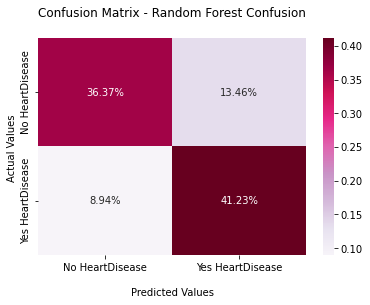

In [41]:
#Confusion Matrix

cm = confusion_matrix(y_test, model_y_predict)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Confusion Matrix - Random Forest Confusion\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])

plt.show()

In [42]:
# Create LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
lr_y_predict = lr.predict(x_test)

print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test,lr_y_predict)}')
print(f'Precission_score: {precision_score(y_test,lr_y_predict)}')
print(f'Recall_score: {recall_score(y_test,lr_y_predict)}')
print(f'F1-score: {f1_score(y_test,lr_y_predict)}')

model: LogisticRegression(random_state=0)
Accuracy_score: 0.7365540244384815
Precission_score: 0.731351340129134
Recall_score: 0.7506285957809503
F1-score: 0.7408645908914057


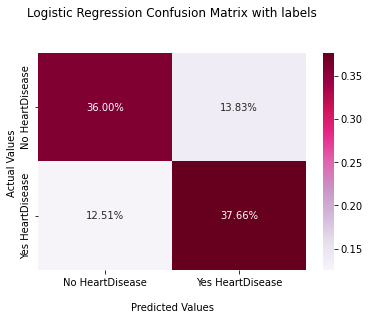

In [43]:
cm  = confusion_matrix(y_test, lr_y_predict)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])

plt.show()

In [44]:
lr.intercept_

array([-3.07939264])

In [45]:
lr.coef_

array([[ 0.28508212,  0.46831118,  1.33845725,  0.3633096 ,  0.75434127,
         0.02858557, -0.0204114 ,  0.54713229]])

In [46]:
print (pd.DataFrame(lr.coef_.transpose(),columns = ["Coeff Value"], index = x_train.columns))


                Coeff Value
AgeCategory        0.285082
DiffWalking        0.468311
Stroke             1.338457
Diabetic           0.363310
KidneyDisease      0.754341
PhysicalHealth     0.028586
GenHealth         -0.020411
Smoking            0.547132


In [47]:
# Create KNeighborsClassifier
k_classifier = KNeighborsClassifier()
k_classifier.fit(x_train, y_train)
k_y_predict = k_classifier.predict(x_test)

print(f'model: {str(k_classifier)}')
print(f'Accuracy_score: {accuracy_score(y_test,k_y_predict)}')
print(f'Precission_score: {precision_score(y_test,k_y_predict)}')
print(f'Recall_score: {recall_score(y_test,k_y_predict)}')
print(f'F1-score: {f1_score(y_test,k_y_predict)}')
#print(classification_report(y_test, k_y_predict))

model: KNeighborsClassifier()
Accuracy_score: 0.7393656257683796
Precission_score: 0.7138251469751564
Recall_score: 0.8020455998295334
F1-score: 0.7553682520569939


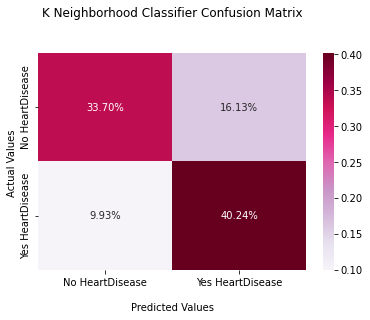

In [48]:
cm  = confusion_matrix(y_test, k_y_predict)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('K Neighborhood Classifier Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])

plt.show()

In [49]:
#Create Naive Bayes
clf3 = GaussianNB()
clf3.fit(x_train, y_train)
y_pred3 = clf3.predict(x_test)
print(f'model: {str(clf3)}')
print(f'Accuracy_score: {accuracy_score(y_test,k_y_predict)}')
print(f'Precission_score: {precision_score(y_test,k_y_predict)}')
print(f'Recall_score: {recall_score(y_test,k_y_predict)}')
print(f'F1-score: {f1_score(y_test,k_y_predict)}')

model: GaussianNB()
Accuracy_score: 0.7393656257683796
Precission_score: 0.7138251469751564
Recall_score: 0.8020455998295334
F1-score: 0.7553682520569939


[Text(0, 0.5, 'No HeartDisease'), Text(0, 1.5, 'Yes HeartDisease')]

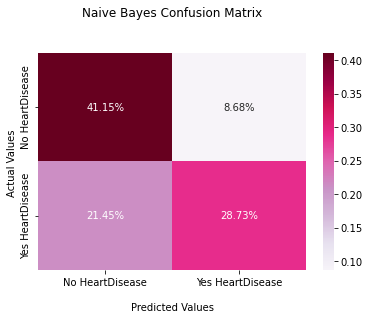

In [50]:
cm  = confusion_matrix(y_test, y_pred3)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])

In [51]:
#Create Decision Tree
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)
y_pred5 = dt.predict(x_test)
print(f'model: {str(dt)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred5)}')
print(f'Precission_score: {precision_score(y_test,y_pred5)}')
print(f'Recall_score: {recall_score(y_test,y_pred5)}')
print(f'F1-score: {f1_score(y_test,y_pred5)}')

model: DecisionTreeClassifier(criterion='entropy')
Accuracy_score: 0.7761302530441196
Precission_score: 0.7554703627248599
Recall_score: 0.8188152567653952
F1-score: 0.785868398179866


[Text(0, 0.5, 'No HeartDisease'), Text(0, 1.5, 'Yes HeartDisease')]

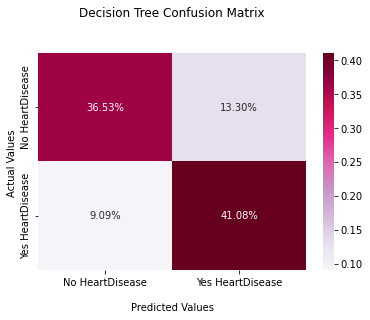

In [52]:
cm  = confusion_matrix(y_test, y_pred5)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Decision Tree Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','Yes HeartDisease'])

In [53]:
dt.feature_importances_

array([0.44206946, 0.11240884, 0.05311246, 0.04980744, 0.01969685,
       0.1411506 , 0.15039063, 0.0313637 ])

In [54]:
print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = x_train.columns))

                     Imp
AgeCategory     0.442069
DiffWalking     0.112409
Stroke          0.053112
Diabetic        0.049807
KidneyDisease   0.019697
PhysicalHealth  0.141151
GenHealth       0.150391
Smoking         0.031364


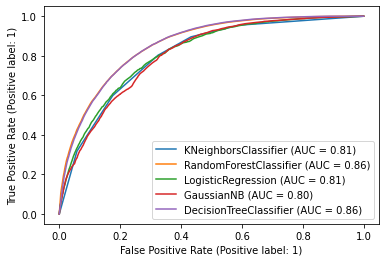

In [55]:
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(k_classifier, x_test, y_test, ax=ax)
rdf_disp = RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
lg_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=ax)
cl3_disp = RocCurveDisplay.from_estimator(clf3, x_test, y_test, ax=ax)
dt_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test, ax=ax)
plt.show()

# Decision Tree Hyper Parameter Tunning

In [56]:
param_grid = {'criterion': ('entropy','gini'),
             'max_depth': list(range(1,9)),
              'min_samples_split':  list(range(1,5))}

In [57]:
gs = GridSearchCV(dt,param_grid,cv=10)

In [58]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4]})

In [59]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 3}

In [60]:
gs.cv_results_['params']

[{'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 1},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 2},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 3},
 {'criterion': 'entropy', 'max_depth': 1, 'min_samples_split': 4},
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 1},
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2},
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 3},
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 4},
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 1},
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2},
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3},
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 4},
 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 1},
 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2},
 {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split':

In [61]:
gs.cv_results_['mean_test_score']

array([       nan, 0.68032479, 0.68032479, 0.68032479,        nan,
       0.69541451, 0.69541451, 0.69541451,        nan, 0.7178808 ,
       0.7178808 , 0.7178808 ,        nan, 0.7345581 , 0.7345581 ,
       0.7345581 ,        nan, 0.74080676, 0.74080676, 0.74080676,
              nan, 0.74366917, 0.74366917, 0.74366917,        nan,
       0.7473895 , 0.7473895 , 0.74738683,        nan, 0.7498804 ,
       0.74988308, 0.74988308,        nan, 0.68032479, 0.68032479,
       0.68032479,        nan, 0.71142905, 0.71142905, 0.71142905,
              nan, 0.72093563, 0.72093563, 0.72093563,        nan,
       0.74188385, 0.74188385, 0.74188385,        nan, 0.74416896,
       0.74416896, 0.74416896,        nan, 0.7454545 , 0.7454545 ,
       0.7454545 ,        nan, 0.74741623, 0.74741623, 0.74741623,
              nan, 0.75033208, 0.75033475, 0.75032674])

In [62]:
#Best Decision Tree on mushroom dataset
dt_Best = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=2)
dt_Best.fit(x_train, y_train)
y_pred5 = dt_Best.predict(x_test)
print(f'model: {str(dt_Best)}')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred5)}')
print(f'Precission_score: {precision_score(y_test,y_pred5)}')
print(f'Recall_score: {recall_score(y_test,y_pred5)}')
print(f'F1-score: {f1_score(y_test,y_pred5)}')

model: DecisionTreeClassifier(max_depth=8)
Accuracy_score: 0.7491901946739932
Precission_score: 0.7193323489280574
Recall_score: 0.8200511399957383
F1-score: 0.7663968296641476


In [63]:
x.head()

,AgeCategory,DiffWalking,Stroke,Diabetic,KidneyDisease,PhysicalHealth,GenHealth,Smoking
0,7,0,0,2,0,3.0,4,1
1,12,0,1,0,0,0.0,4,0
2,9,0,0,2,0,20.0,1,1
3,11,0,0,0,0,0.0,2,0
4,4,1,0,0,0,28.0,4,0


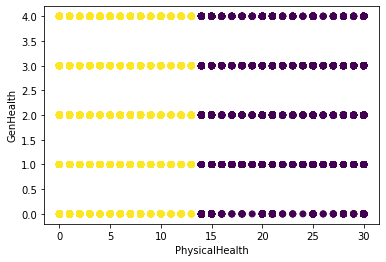

In [64]:
data = x.loc[:,['PhysicalHealth','GenHealth']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)
labels = kmeans.predict(data)
plt.scatter(data['PhysicalHealth'],data['GenHealth'],c = labels)
plt.xlabel('PhysicalHealth')
plt.ylabel('GenHealth')
plt.show()

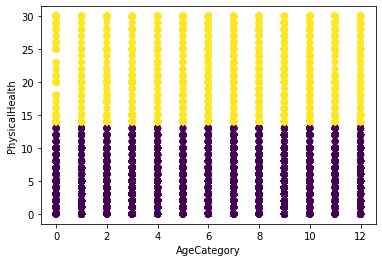

In [65]:
data = x.loc[:,['AgeCategory','PhysicalHealth']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)
labels = kmeans.predict(data)
plt.scatter(data['AgeCategory'],data['PhysicalHealth'],c = labels)
plt.xlabel('AgeCategory')
plt.ylabel('PhysicalHealth')
plt.show()

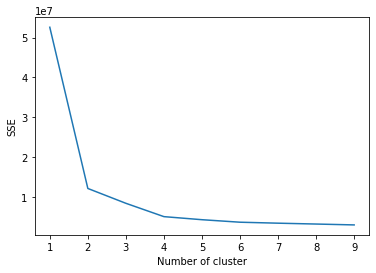

In [78]:
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [74]:
#For K value 2
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = train_df['HeartDisease']
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 194857 out of 467702 samples were correctly labeled.
Accuracy score: 0.42


In [75]:
#For K value 3
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = train_df['HeartDisease']
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 250539 out of 467702 samples were correctly labeled.
Accuracy score: 0.54


In [76]:
#For K value 4
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = train_df['HeartDisease']
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 147641 out of 467702 samples were correctly labeled.
Accuracy score: 0.32


In [77]:
#For K value 5
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = train_df['HeartDisease']
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(x)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 143372 out of 467702 samples were correctly labeled.
Accuracy score: 0.31
